# Projet 2: Nettoyage des données

## Importation des éléments de travail

In [1]:
import pandas as pd
import missingno as msno
import math
import numpy as np

In [2]:
food_facts = pd.read_csv("foodfacts.csv", sep = '\t', low_memory=False)

In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
food_facts.head() # Voyons à quoi ressemble les données

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

Il semble qu'il y ait des zones du tableau ou il manque beaucoup de valeurs. L'un des objectifs du nettoyage des données est justement d'identifier les colonnes trop peu renseignés pour être utilisables.

Les colonnes "pnns_groups_1" et "pnns_groups_2" indiquent des catégories de produits.

In [5]:
food_facts['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [6]:
food_facts['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

In [7]:
nbre_lignes_initial, nbre_colonnes_initial = food_facts.shape
nbre_lignes_initial, nbre_colonnes_initial

(320772, 162)

## Suppression des colonnes et des lignes 

On va supprimer les colonnes et les lignes ayant trop de valeurs manquantes, ainsi que des colonnes manifestement inutiles pour notre application.

### Visualisation des valeurs manquantes

<AxesSubplot:>

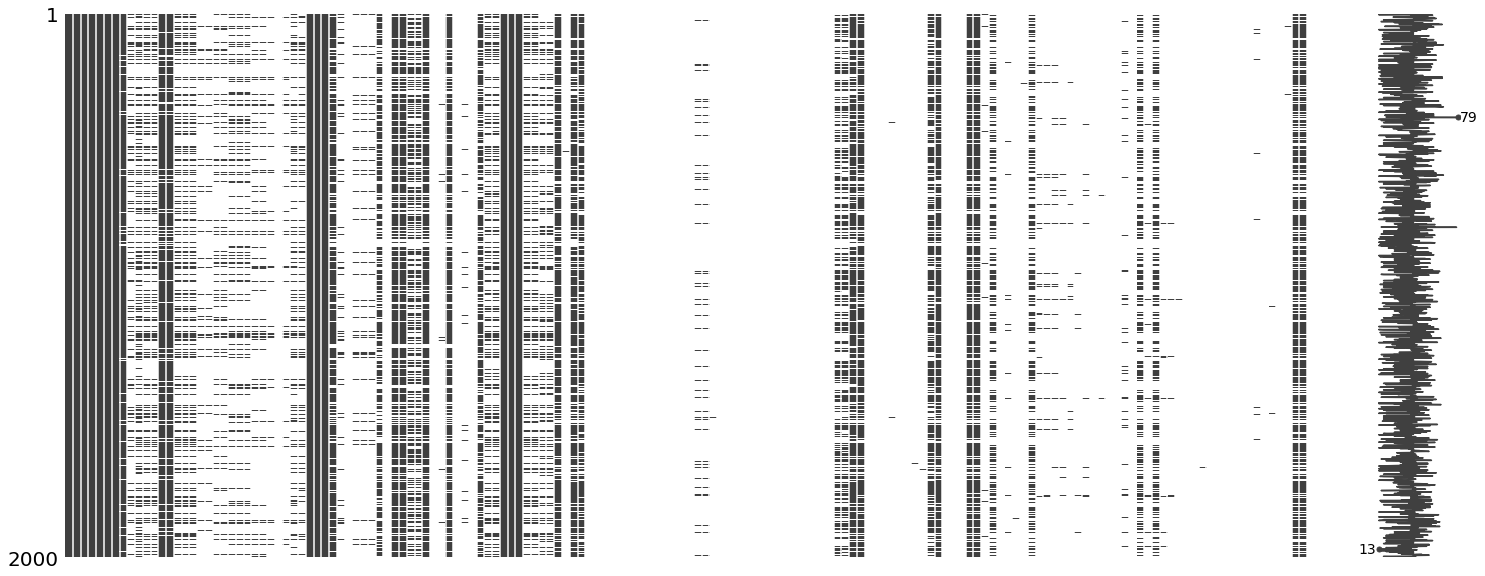

In [8]:
msno.matrix(food_facts.sample(2000))
# Les cases remplies sont en noire, les cases vides en blanc.

### Suppression de colonnes où il manque trop de valeurs

Au-delà d'une certaine proportion de valeurs manquantes sur une colonne, on supprime la colonne. Le choix de la proportion limite est arbitraire mais en fait il y a essentiellement des colonnes très remplies et des colonnes très vides: passer d'une proportion limite de 50% à 51%, 52%, 53%... ne va pas préserver une ou deux colonnes de plus à chaque fois.

Néanmoins on souhaite à terme créer une application qui ne se contente pas d'indiquer à l'utilisateur ce qu'il y a déjà d'écrit sur l'étiquette d'un produit, mais qui va surtout lui recommander des produits qui lui sont addaptés. On va donc garder les colonnes contenat les catégories de produits même si celle-ci sont moins remplies que le seuil choisi.

In [9]:
seuil_colonne = 0.5 # proportion de Nan au-delà de laquelle une colonne sera supprimée

In [10]:
def sup_nan_colonne(df, seuil_colonne, exception):
    """
    Supprime les colonne du DataFrame df ayant un taux de valeurs manquantes supérieur ou égale à seuil_colonne
    sauf les colonnes de la liste 'exception'
    """
    for c in df.columns:
        if (df[c].isna().mean() >= seuil_colonne) and (c not in exception):
            del df[c]
    return df

In [11]:
exception = ['pnns_groups_1', 'pnns_groups_2']

In [12]:
food_facts = sup_nan_colonne(food_facts, seuil_colonne, exception)

In [13]:
print("Nombre de colonnes initial :", nbre_colonnes_initial)
print("Nombre de colonnes supprimées :", nbre_colonnes_initial - food_facts.shape[1])

Nombre de colonnes initial : 162
Nombre de colonnes supprimées : 126


<AxesSubplot:>

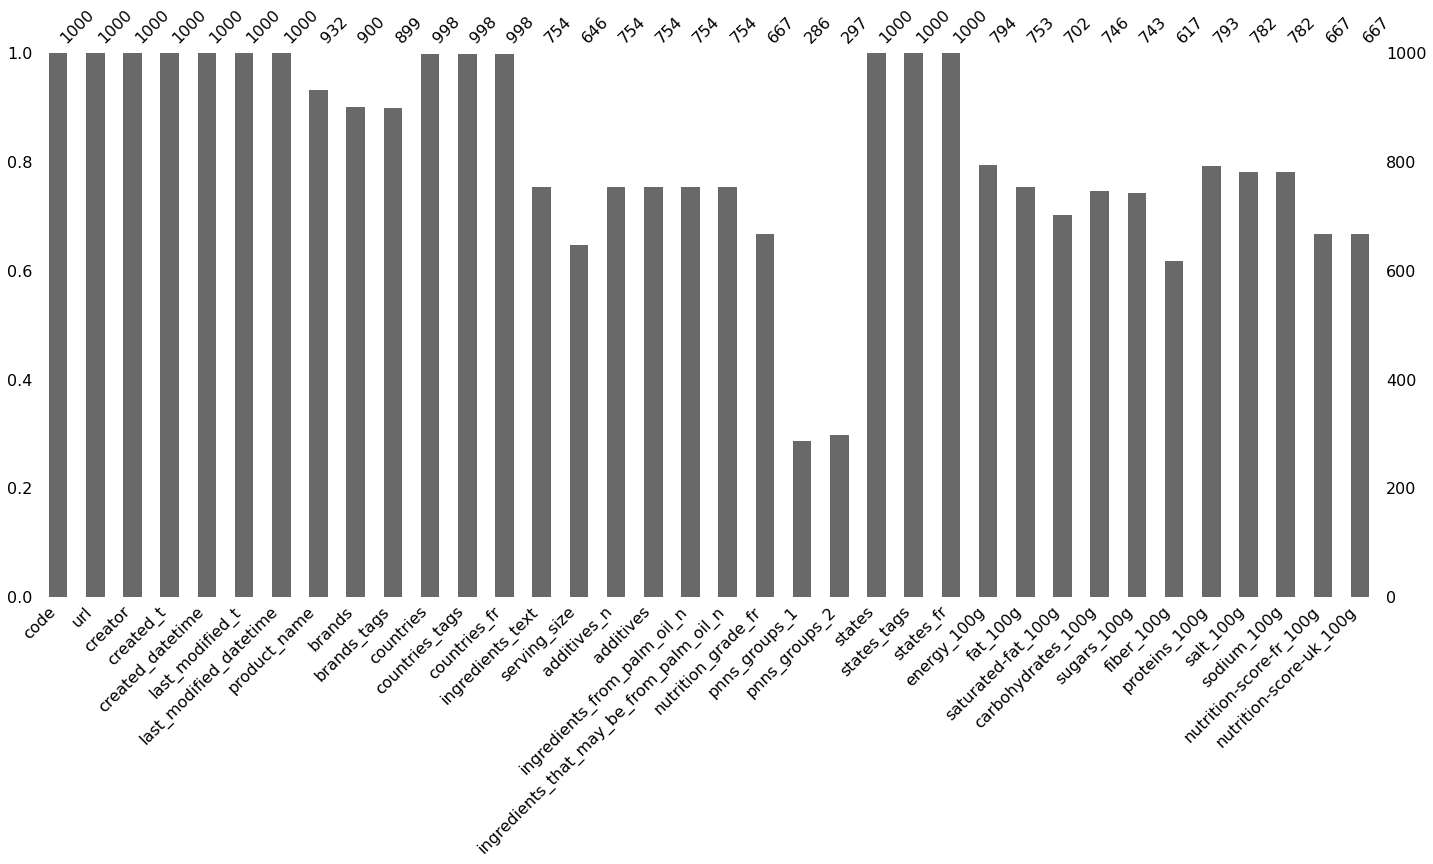

In [14]:
msno.bar(food_facts.sample(1000))

### Suppression de colonnes inutiles

In [15]:
food_facts.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

Certaines informations sont redondantes ('countries' et 'countries_fr') et d'autres n'apporterons rien à l'utilisateur ('url', 'created_t'...). Nous allons supprimer ces colonnes.  

In [16]:
# Liste des colonnes à supprimer
del_colonne = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
              'countries', 'countries_tags', 'nutrition-score-uk_100g', 'brands', 'brands_tags',
              'states', 'states_tags', 'states_fr']

In [17]:
# Suppression des colonnes
food_facts = food_facts.drop(del_colonne, axis=1)

In [18]:
food_facts.shape

(320772, 22)

<AxesSubplot:>

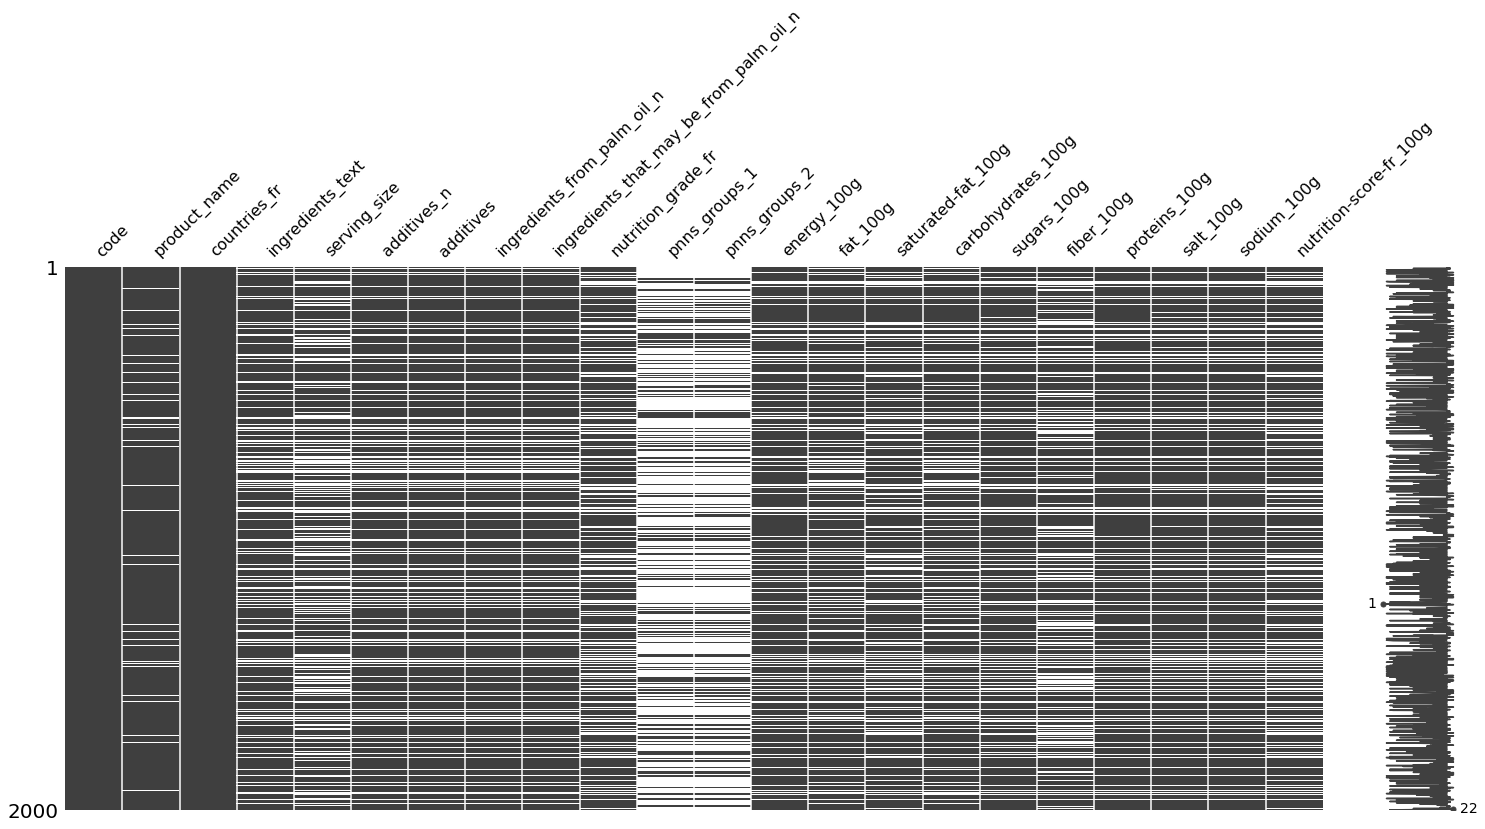

In [19]:
msno.matrix(food_facts.sample(2000))

### Suppression de lignes

Nous allons également supprimer les lignes où il manque trop de valeur (plus qu'un certain seuil).

In [20]:
nbre_colonnes = food_facts.shape[1]

In [21]:
seuil_ligne = 0.7
nbre_seuil_ligne = math.floor(seuil_ligne * nbre_colonnes)+1
nbre_seuil_ligne

16

In [22]:
food_facts = food_facts.dropna(thresh=nbre_seuil_ligne) 

In [23]:
food_facts.shape

(228729, 22)

In [24]:
print("Nombre de lignes supprimées :", nbre_lignes_initial - food_facts.shape[0])

Nombre de lignes supprimées : 92043


In [25]:
food_facts.head(10)

,code,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1,0000000004530,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
2,0000000004559,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0
3,0000000016087,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
5,0000000016100,Breadshop Honey Gone Nuts Granola,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,NaN,NaN,1933.0,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
7,0000000016124,Organic Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,NaN,NaN,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
8,0000000016193,Organic Dark Chocolate Minis,États-Unis,"Organic chocolate liquor, organic raw cane sug...",40 g (40 g),0.0,[ organic-chocolate-liquor -> en:organic-choc...,0.0,0.0,NaN,NaN,NaN,2406.0,37.50,22.50,55.00,42.50,7.5,5.00,NaN,NaN,NaN
12,0000000016872,Zen Party Mix,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,NaN,NaN,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
13,0000000016933,Organic Golden Flax Seeds,États-Unis,Organic golden flax seeds,21 g (2 Tbsp),0.0,[ organic-golden-flax-seeds -> en:organic-gol...,0.0,0.0,NaN,NaN,NaN,2590.0,42.86,4.76,38.10,NaN,38.1,19.05,0.09652,0.038,NaN
14,0000000017497,Organic Spicy Punks,États-Unis,"Organic dry roasted pumpkin seeds, tamari (soy...",33 g (0.25 cup),0.0,[ organic-dry-roasted-pumpkin-seeds -> en:org...,0.0,0.0,NaN,NaN,NaN,2536.0,48.48,9.09,15.15,NaN,15.2,30.30,0.57658,0.227,NaN
15,0000000018012,Cinnamon Nut Granola,États-Unis,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),0.0,[ organic-rolled-oats -> en:organic-rolled-oa...,0.0,0.0,b,NaN,NaN,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


## Traitement des valeurs aberrantes

In [26]:
# Commençons par tester le type des éléments des différentes colonnes
food_facts.dtypes

code                                        object
product_name                                object
countries_fr                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                      

In [27]:
food_facts.describe() 
# Les valeurs minimums et maximums de chaque variable nous indiqueront s'il y a des valeurs aberrantes.

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,224767.000000,224767.000000,224767.000000,2.285750e+05,227691.000000,207347.000000,227691.000000,222273.00000,180684.000000,228150.000000,227997.000000,227982.000000,199992.000000
mean,2.018557,0.019958,0.054452,1.160618e+03,12.902760,5.040743,32.634710,16.04089,2.915914,7.132718,1.739415,0.684852,9.139251
std,2.527677,0.141565,0.266142,6.880431e+03,17.563705,7.819922,29.071746,22.44150,13.427871,8.305343,135.628830,53.398932,9.061484
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.86000,-6.700000,-800.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.930000e+02,0.000000,0.000000,6.600000,1.38000,0.000000,0.780000,0.066040,0.026000,1.000000
50%,1.000000,0.000000,0.000000,1.125000e+03,5.360000,1.790000,21.540000,5.83000,1.600000,4.800000,0.589280,0.232283,10.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.590000,7.140000,59.000000,24.00000,3.600000,10.017500,1.361440,0.536000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,209.380000,3520.00000,5380.000000,430.000000,64312.800000,25320.000000,40.000000


### Une ligne de valeur aberrantes!

In [28]:
food_facts[food_facts['fiber_100g'] == food_facts['fiber_100g'].max()]

,code,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
313506,8710573641501,"Nusco, Chocolate Spread, Chocolate",États-Unis,"Sugar, vegetable oils, (rapeseed, palm), low f...",1 g (1 g),1.0,[ sugar -> en:sugar ] [ vegetable-oils -> e...,0.0,0.0,e,NaN,NaN,231199.0,NaN,550.0,NaN,3520.0,5380.0,430.0,0.01016,0.004,25.0


On va remplacer les valeurs manifestement fausses par des Nan afin quelle ne faussent pas l'analyse univariée. Toutes les valeurs de masse pour 100g doivent être comprise entre 0 et 100. Les valeurs d'énergie pour 100g doivent être comprise entre 0 et 900 kcal. Les valeurs de "nutrition-score-fr_100g" doivent être comprises entre -15 et 40, ce qui est bien le cas dans nos données.

In [29]:
quantite_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']
quantite_et_energie_100g = ['energy_100g','fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']

In [30]:
# On va compter le nombre de valeurs remplacées par Nan
liste = [food_facts[c].isna().value_counts().to_list()[1] for c in quantite_et_energie_100g]
ecart = pd.DataFrame(liste, index =quantite_et_energie_100g, columns=['nbre_de_nan_avant'])

In [31]:
food_facts.loc[(food_facts['energy_100g'] > 900), 'energy_100g'] = np.nan
food_facts.loc[(food_facts['energy_100g'] < 0), 'energy_100g'] = np.nan

In [32]:
for c in quantite_100g:
    food_facts.loc[(food_facts[c] > 100), c] = np.nan
    food_facts.loc[(food_facts[c] < 0), c] = np.nan

In [33]:
liste_apres = [food_facts[c].isna().value_counts().to_list()[1] for c in quantite_et_energie_100g]
ecart['nbre_de_nan_après'] = pd.DataFrame(liste_apres, index =quantite_et_energie_100g, columns=['nbre_de_nan_après'])['nbre_de_nan_après']
ecart['difference']=ecart['nbre_de_nan_après']-ecart['nbre_de_nan_avant']
ecart

,nbre_de_nan_avant,nbre_de_nan_après,difference
energy_100g,154,96565,96411
fat_100g,1038,1040,2
saturated-fat_100g,21382,21385,3
carbohydrates_100g,1038,1049,11
sugars_100g,6456,6470,14
fiber_100g,48045,48048,3
proteins_100g,579,582,3
salt_100g,732,800,68
sodium_100g,747,774,27


On remarque qu'il y avait beaucoup de valeurs aberrantes pour l'énergie comparé aux autres variables.

Enfin, les quantités de sel et de sodium comptent parfois trop de chiffres après la virgule: une précision au-delà du mg est aberrante.

In [34]:
food_facts[['salt_100g', 'sodium_100g']] = food_facts[['salt_100g', 'sodium_100g']].apply(lambda x: round(x, 3))

## Export du fichier nettoyé

In [35]:
food_facts.to_csv("food_facts_nettoye.csv", index = False)